### 폐교 기준에 대한 클러스터링 시행

폐교 기준 1: 연도별 학생 수 감소 기울기

폐교 기준 2: 집계 마지막 연도의 지역 인구 대비 상대적 학생 수

실험: 실제로 폐교된 학교와 그렇지 않은 학교가 모두 포함된 데이터셋으로 클러스터링을 진행, 실제로 데이터가 나눠지는지를 확인해보자.

#### 1. 회귀 직선의 기울기 feature을 먼저 뽑아준다.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [15]:
original = pd.read_csv('D:/DSL/EDA/Data/고등학교_데이터셋.csv', encoding = 'cp949')

df = original.iloc[:, :21]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   학교_식별자   2349 non-null   object 
 1   소재지지번주소  2349 non-null   object 
 2   개방ID     2349 non-null   int64  
 3   위도       2349 non-null   float64
 4   경도       2349 non-null   float64
 5   시군구별     2331 non-null   object 
 6   2009     2349 non-null   int64  
 7   2010     2349 non-null   int64  
 8   2011     2349 non-null   int64  
 9   2012     2349 non-null   int64  
 10  2013     2349 non-null   int64  
 11  2014     2349 non-null   int64  
 12  2015     2349 non-null   int64  
 13  2016     2349 non-null   int64  
 14  2017     2349 non-null   int64  
 15  2018     2349 non-null   int64  
 16  2019     2349 non-null   int64  
 17  2020     2349 non-null   int64  
 18  2021     2349 non-null   int64  
 19  2022     2349 non-null   int64  
 20  2023     2349 non-null   int64  
dtypes: float64(2),

In [51]:
numericals = np.array(df.iloc[:,6:])
X = np.arange(start = 1, stop = 16, step = 1).reshape(-1,1)

slopes = np.zeros(numericals.shape[0])

def norm(vector):
    return vector/vector.max()

for i, point in enumerate(numericals):
    
    tmp = LinearRegression()
    tmp.fit(X, norm(point))
    slopes[i] = tmp.coef_[0]


(2349,)

In [52]:
new_cols = ['회귀계수']

coeff = pd.DataFrame(slopes, columns = new_cols)

new_df = pd.concat([df, coeff], axis = 1)

In [57]:
values = new_df['시군구별'].unique()

print(len(values))

248


In [86]:
df_population = pd.read_csv('D:/DSL/EDA/Data/2011-2023_시군구_인구_전처리완료.csv', encoding = 'cp949')
df_schools = pd.read_csv('D:/DSL/EDA/Data/고등학교_데이터셋.csv', encoding = 'cp949')

In [108]:
# 병합을 위한 데이터 전처리
new_df["시군구별"] = new_df["시군구별"].astype(str)
df_population["행정구역"] = df_population["행정구역"].astype(str)

# 시군구별과 행정구역 매칭을 위한 새로운 컬럼 생성
new_df["매칭된 행정구역"] = new_df["시군구별"].apply(
    lambda x: df_population[df_population["행정구역"].str.contains(x, na=False)]["행정구역"].values[0]
    if any(df_population["행정구역"].str.contains(x, na=False)) else None
)

# 2023년도 인구 데이터만 필터링
df_population_2023 = df_population[df_population["조사년도"] == 2023]

# 매칭된 데이터를 병합 (2023년 인구수만, 원래 데이터 크기 유지)
df_merged_2023 = new_df.merge(df_population_2023, left_on="매칭된 행정구역", right_on="행정구역", how="left")

# 원래 학교 데이터 크기 유지 (인구 데이터가 없는 경우 NaN 처리)
df_merged_2023 = df_merged_2023[["학교_식별자", "시군구별", "매칭된 행정구역", "인구 수", '2023', '회귀계수']]

In [109]:
df_merged_2023.info()
df_merged_2023.to_csv('D:/DSL/EDA/Data/2023년도_학생_인구비_v1.csv', encoding = 'cp949')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2349 entries, 0 to 2348
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교_식별자    2349 non-null   object 
 1   시군구별      2349 non-null   object 
 2   매칭된 행정구역  2310 non-null   object 
 3   인구 수      2310 non-null   float64
 4   2023      2349 non-null   int64  
 5   회귀계수      2349 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 110.2+ KB


In [110]:
df_merged_2023['학생 비'] = df_merged_2023['2023'] / df_merged_2023['인구 수']

df_merged_2023.to_csv('D:/DSL/EDA/Data/2023년도_학생_인구비_v2.csv', encoding = 'cp949')

In [122]:
data = pd.concat([df_schools, coeff], axis =1)

data['학생 비'] = data['2023'] / data['2023_해당지역예측학생수']

data.to_csv('D:/DSL/EDA/Data/K-means_재료_1.csv', encoding = 'cp949')

K-means clustering

<>:7: SyntaxWarning: invalid escape sequence '\D'
<>:7: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Monet\AppData\Local\Temp\ipykernel_23536\361529898.py:7: SyntaxWarning: invalid escape sequence '\D'
  file_path = "D:\DSL\EDA\Data/K-means_재료_1.csv"


    Cluster  Count
0         1    411
1        15    306
2         3    279
3        14    213
4         9    204
5         8    162
6         0    112
7        17    103
8        11     98
9         4     64
10       16     58
11        5     53
12       18     45
13       19     38
14        7     34
15        2     29
16       13     21
17       12     14
18       10      8
19        6      5


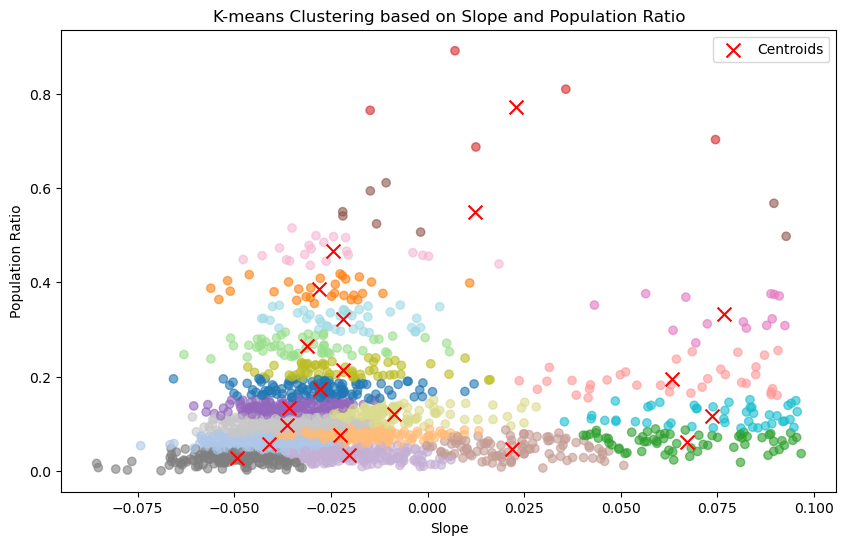

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
file_path = "D:\DSL\EDA\Data/K-means_재료_1.csv"
df = pd.read_csv(file_path, encoding='cp949')

# Remove rows where '학생 비' has infinite values
df = df[~np.isinf(df['학생 비'])].copy()

# Select features for clustering: Regression coefficient and population ratio
selected_features = ['회귀계수', '학생 비']
X = df[selected_features]

# Apply K-means clustering with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
print(cluster_counts)

# Plot the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(df['회귀계수'], df['학생 비'], c=df['Cluster'], cmap='tab20', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')

# Set labels in English
plt.xlabel('Slope')
plt.ylabel('Population Ratio')
plt.title('K-means Clustering based on Slope and Population Ratio')
plt.legend()
plt.show()
